In [ ]:
print('Hello World')

Hello World


# SVM (Support Vector Machine)

In [ ]:
import pandas as pd

In [ ]:
# Dataset: PRDECT-ID
PATH = "PRDECT-ID Dataset.csv"
datasets = pd.read_csv(PATH)
datasets.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [ ]:
column = ['Customer Review', 'Sentiment', 'Emotion']
dataset = datasets[column]
dataset.head()

,Customer Review,Sentiment,Emotion
0,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


## Preprocessing

In [ ]:
pd.set_option("display.max_colwidth", None)

### Case Folding

In [ ]:
dataset["Customer Review"].head()

,Customer Review
0,Alhamdulillah berfungsi dengan baik. Packaging aman. Respon cepat dan ramah. Seller dan kurir amanah
1,"barang bagus dan respon cepat, harga bersaing dengan yg lain."
2,"barang bagus, berfungsi dengan baik, seler ramah, pengiriman cepat"
3,bagus sesuai harapan penjual nya juga ramah. trimakasih pelapak ??
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi dengan Baik"


In [ ]:
def clean_review(text):
    if isinstance(text, str):
        text = text.lower()  # Case folding
        text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Special Characters
        return text
    return text

In [ ]:
dataset["Customer Review"] = dataset["Customer Review"].apply(clean_review)
dataset[["Customer Review"]].head()

<ipython-input-8-db4a1fb7f8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Customer Review"] = dataset["Customer Review"].apply(clean_review)


,Customer Review
0,alhamdulillah berfungsi dengan baik packaging aman respon cepat dan ramah seller dan kurir amanah
1,barang bagus dan respon cepat harga bersaing dengan yg lain
2,barang bagus berfungsi dengan baik seler ramah pengiriman cepat
3,bagus sesuai harapan penjual nya juga ramah trimakasih pelapak
4,barang bagus pengemasan aman dapat berfungsi dengan baik


### Encoding

In [ ]:
dataset["Sentiment"].value_counts()

,count
Sentiment,
Negative,2821
Positive,2579


In [ ]:
# Sentiment= [ Positive: 1, Negative: 0]
dataset['Sentiment'] = dataset['Sentiment'].map({'Positive': 1, 'Negative': 0})

<ipython-input-10-b45be2a6c363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'] = dataset['Sentiment'].map({'Positive': 1, 'Negative': 0})


In [ ]:
(dataset["Sentiment"].value_counts())

,count
Sentiment,
0,2821
1,2579


In [ ]:
dataset["Emotion"].value_counts()

,count
Emotion,
Happy,1770
Sadness,1202
Fear,920
Love,809
Anger,699


In [ ]:
# Emotion= [ Happy: 0,  Sadness: 1,  Anger: 2,  Love: 3,  Fear: 4]
dataset['Emotion'] = dataset['Emotion'].map({'Happy': 0,'Sadness': 1,'Anger': 2, 'Love':3, 'Fear': 4})

<ipython-input-13-b840fe5ca44f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Emotion'] = dataset['Emotion'].map({'Happy': 0,'Sadness': 1,'Anger': 2, 'Love':3, 'Fear': 4})


In [ ]:
dataset["Emotion"].value_counts()

,count
Emotion,
0,1770
1,1202
4,920
3,809
2,699


### Vectorization

In [ ]:
dataset["Customer Review"].head()

,Customer Review
0,alhamdulillah berfungsi dengan baik packaging aman respon cepat dan ramah seller dan kurir amanah
1,barang bagus dan respon cepat harga bersaing dengan yg lain
2,barang bagus berfungsi dengan baik seler ramah pengiriman cepat
3,bagus sesuai harapan penjual nya juga ramah trimakasih pelapak
4,barang bagus pengemasan aman dapat berfungsi dengan baik


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset["Customer Review"])
y = dataset[["Sentiment","Emotion"]]

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

### Data Partition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  5400 non-null   object
 1   Sentiment        5400 non-null   int64 
 2   Emotion          5400 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 126.7+ KB


In [ ]:
dataset.describe()

,Sentiment,Emotion
count,5400.000000,5400.000000
mean,0.477593,1.612407
std,0.499544,1.488349
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,3.000000
max,1.000000,4.000000


In [ ]:
dataset.describe(include="object")

,Customer Review
count,5400
unique,5271
top,mantap
freq,7


### Missing Values and Duplicates

In [ ]:
dataset.isnull().sum()

,0
Customer Review,0
Sentiment,0
Emotion,0


In [ ]:
print(dataset.duplicated().sum())

100


In [ ]:
dataset[dataset.duplicated()]

,Customer Review,Sentiment,Emotion
29,mantap kipasnya kenceng barangnya berkualitas sesuai sama harga,1,0
72,tidak berfungsi tapi yaa sudahlah sudah ditambah daya pakai mikro usb cas hp tetap tidak bisa,0,1
78,sangat kecewa baru 4 bulan scroll sudah rusak,0,1
189,biarkan gambar bercerita pesan 20 bh yg rusak 10 bh jgn percaya balasan pembelaan apapun dari seller tidak amanah alasan rusak expedisi padahal bisa dilihat sebagian letak cacat 100 bukan dari expedisi dan sebagian yg lain kalaupun dari expedisi ceroboh itu karena packingan tanpa kardus per satuannya dan bubble juga tipis sekali lewat seadanya tanpa tempelan fragile padahal sudah pesan bubble dan kardus tambahan seller berusaha dilimpahkan biar diganti asuransi untung sudah diviseo unboxing dan ditolak jg dr expedisi saya tidak pernah cerita panjang lebar di ulasan tapi berhubung demi kenyamanan buyer lain utk jadi pertimbangan bacalah ini waspadalah waspadalah tidak ada itikad baik berusaha lepas tangan bahaya bisa rusak tokopedia kalau banyak seller begini sudah dikasih note sewaktu proses dan sudah juga dichat dulu sebelum kirim utk hati hati karena mau utk dijual lagi sudah ajukan resolusi pengambalian dana ke tokopedia tp dialihkan ke asuransi utk akhirnya tetap tokopeda refund dana trims admin,0,4
190,seharusnya chat dijadikan makesure barang warna dll jgn kaku kaku bgt jadi roko,0,4
...,...,...,...
4653,sesuai harga,1,0
4660,barang sesuai deskripsi,1,0
4975,penjual tidak ramah,0,2
5173,pengiriman cepat pesanan sesuai gak ada cacat packing aman,1,0


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
print(dataset.duplicated().sum())

0


In [ ]:
dataset.to_csv('clean_df.csv', index=False)

In [ ]:
dataset.head()

,Customer Review,Sentiment,Emotion
0,alhamdulillah berfungsi dengan baik packaging aman respon cepat dan ramah seller dan kurir amanah,1,0
1,barang bagus dan respon cepat harga bersaing dengan yg lain,1,0
2,barang bagus berfungsi dengan baik seler ramah pengiriman cepat,1,0
3,bagus sesuai harapan penjual nya juga ramah trimakasih pelapak,1,0
4,barang bagus pengemasan aman dapat berfungsi dengan baik,1,0


### Data Distributions

In [ ]:
datasets = datasets.drop_duplicates()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-32-b61850cd808c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=dataset, palette="coolwarm").set_xticklabels(["Negative", "Positive"])
<ipython-input-32-b61850cd808c>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(x="Sentiment", data=dataset, palette="coolwarm").set_xticklabels(["Negative", "Positive"])


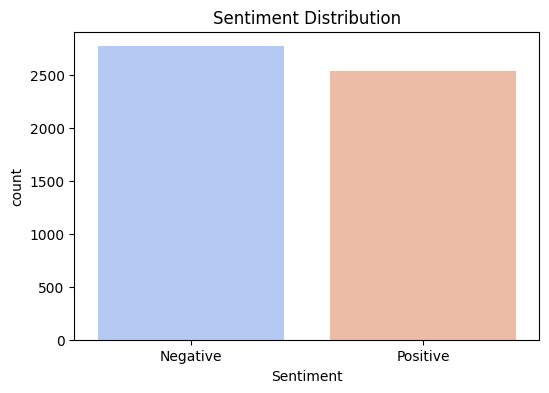

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sentiment", data=dataset, palette="coolwarm").set_xticklabels(["Negative", "Positive"])

plt.title("Sentiment Distribution")
plt.show()


<ipython-input-33-84d5b7755619>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Happy", "Sadness", "Anger", "Love", "Fear"])
<ipython-input-33-84d5b7755619>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Happy", "Sadness", "Anger", "Love", "Fear"])


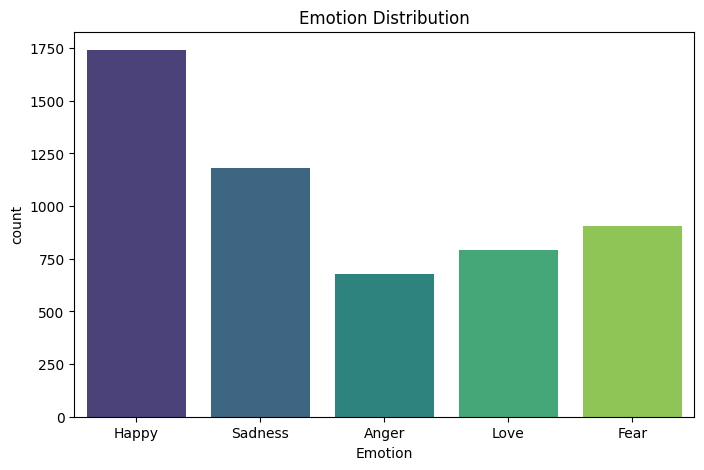

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Happy", "Sadness", "Anger", "Love", "Fear"])

plt.xticks(rotation=0)
plt.title("Emotion Distribution")
plt.show()

<ipython-input-34-4c717376ae4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=datasets, palette="viridis")


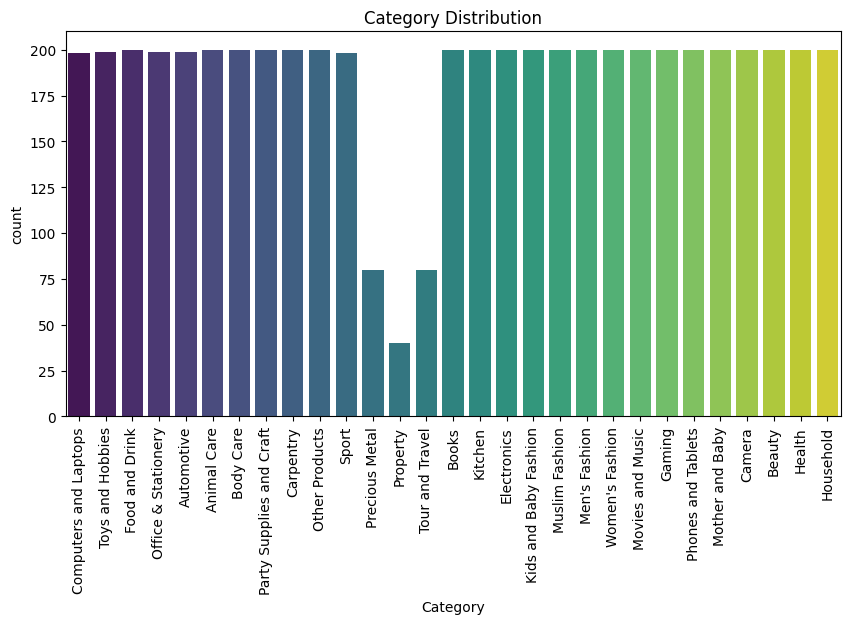

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Category", data=datasets, palette="viridis")
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

### Correlation Matrix

In [ ]:
datasets['Sentiment'] = datasets['Sentiment'].map({'Positive': 1, 'Negative': 0})
datasets['Emotion'] = datasets['Emotion'].map({'Happy': 0,'Sadness': 1,'Anger': 2, 'Love':3, 'Fear': 4})

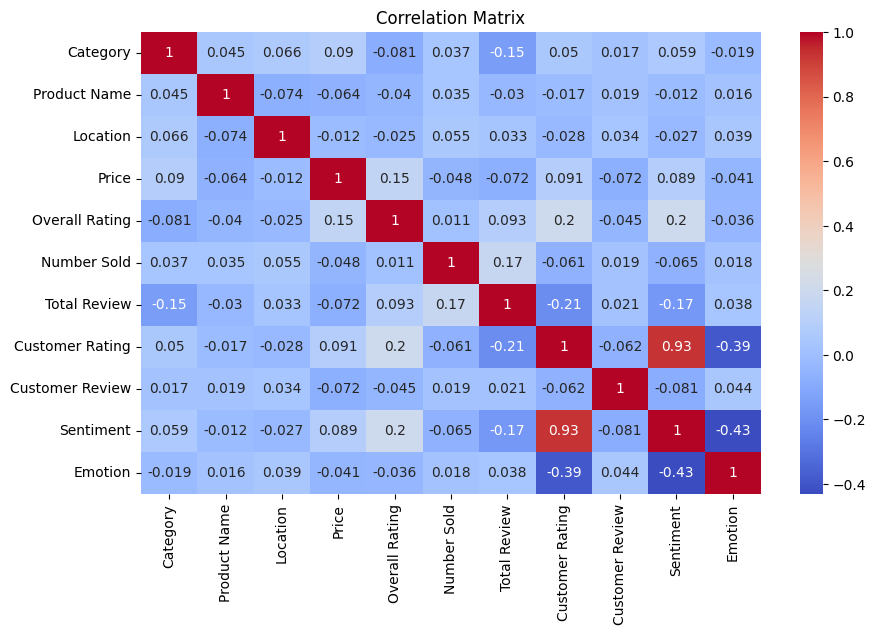

In [ ]:
# datasets["Sentiment"] = datasets["Sentiment"].astype("category").cat.codes
# datasets["Emotion"] = datasets["Emotion"].astype("category").cat.codes
datasets["Customer Review"] = datasets["Customer Review"].astype("category").cat.codes

datasets["Category"] = datasets["Category"].astype("category").cat.codes
datasets["Product Name"] = datasets["Product Name"].astype("category").cat.codes
datasets["Location"] = datasets["Location"].astype("category").cat.codes


plt.figure(figsize=(10, 6))
sns.heatmap(datasets.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# SVM - Train Test Val

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import itertools
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import time
import pandas as pd

In [ ]:
dataset = pd.read_csv("clean_df.csv")

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset["Customer Review"])
y_sentiment = dataset["Sentiment"]
y_emotion = dataset["Emotion"]

X_train, X_test, y_train_sent, y_test_sent = train_test_split(X, y_sentiment, test_size=0.2, random_state=42)
_, _, y_train_emot, y_test_emot = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

In [ ]:
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto', 0.01, 0.1, 1]
# 80 Combination

In [ ]:
def get_best_model(X_train, y_train):
    best_score = 0
    best_params = {}
    for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
        model = SVC(C=C, kernel=kernel, gamma=gamma)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
    return best_score, best_params

In [ ]:
def get_best_model(X_train, y_train):
    best_score = 0
    best_params = {}
    start_total = time.time()

    for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
        model = SVC(C=C, kernel=kernel, gamma=gamma)
        print(f"\nEvaluating: C={C}, kernel={kernel}, gamma={gamma}")

        fold_times = []
        start_combo = time.time()
        for fold in range(5):
            start = time.time()
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            end = time.time()
            fold_times.append(end - start)

        mean_score = np.mean(scores)
        combo_time = time.time() - start_combo

        print(f"Mean Accuracy: {mean_score:.4f}")
        print(f"Total Time for combination: {combo_time:.2f} seconds")
        print(f"Average time per fold: {np.mean(fold_times):.2f} seconds")

        if mean_score > best_score:
            best_score = mean_score
            best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}

    end_total = time.time()
    total_time = end_total - start_total
    print(f"\n🚀 Total Time: {end_total - start_total:.2f} seconds")
    return best_score, best_params, total_time


In [ ]:
best_score_sent, best_params_sent, total_time_sent = get_best_model(X_train, y_train_sent)
best_score_emot, best_params_emot,total_time_emot = get_best_model(X_train, y_train_emot)


Evaluating: C=0.1, kernel=linear, gamma=scale
Mean Accuracy: 0.8967
Total Time for combination: 39.94 seconds
Average time per fold: 7.99 seconds

Evaluating: C=0.1, kernel=linear, gamma=auto
Mean Accuracy: 0.8967
Total Time for combination: 37.31 seconds
Average time per fold: 7.46 seconds

Evaluating: C=0.1, kernel=linear, gamma=0.01
Mean Accuracy: 0.8967
Total Time for combination: 36.95 seconds
Average time per fold: 7.39 seconds

Evaluating: C=0.1, kernel=linear, gamma=0.1
Mean Accuracy: 0.8967
Total Time for combination: 37.24 seconds
Average time per fold: 7.45 seconds

Evaluating: C=0.1, kernel=linear, gamma=1
Mean Accuracy: 0.8967
Total Time for combination: 36.77 seconds
Average time per fold: 7.35 seconds

Evaluating: C=0.1, kernel=rbf, gamma=scale
Mean Accuracy: 0.7767
Total Time for combination: 51.07 seconds
Average time per fold: 10.21 seconds

Evaluating: C=0.1, kernel=rbf, gamma=auto
Mean Accuracy: 0.5243
Total Time for combination: 53.51 seconds
Average time per fold

## Time Results
- 80 Combination of Parameters:
- Total Time CV Sentiment: 3309.28s / 55min
- Total Time CV Emotion: 5628.31 / 93min

In [ ]:
final_model = SVC(**best_params_sent)
start_time = time.time()
final_model.fit(X_train, y_train_sent)
end_time = time.time()

In [ ]:
final_model_e = SVC(**best_params_emot)
start_time = time.time()
final_model_e.fit(X_train, y_train_emot)
end_time = time.time()

In [ ]:
y_pred_sent = final_model.predict(X_test).T

In [ ]:
y_pred_emot = final_model_e.predict(X_test).T

In [ ]:
acc_sent = accuracy_score(y_test_sent, y_pred_sent)
acc_emot = accuracy_score(y_test_emot, y_pred_emot)

In [ ]:
print("=== Best Cross-Val Results ===")
print(f"Best Accuracy Sentiment: {best_score_sent:.4f}")
print(f"Best Params Sentiment: {best_params_sent}")
print(f"Best Accuracy Emotion: {best_score_emot:.4f}")
print(f"Best Params Emotion: {best_params_emot}")

print("\n=== Final Test Set Accuracy ===")
print(f"Test Accuracy Sentiment: {acc_sent:.4f}")
print(f"Test Accuracy Emotion: {acc_emot:.4f}")

=== Best Cross-Val Results ===
Best Accuracy Sentiment: 0.9415
Best Params Sentiment: {'C': 1, 'kernel': 'sigmoid', 'gamma': 'scale'}
Best Accuracy Emotion: 0.6071
Best Params Emotion: {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}

=== Final Test Set Accuracy ===
Test Accuracy Sentiment: 0.9387
Test Accuracy Emotion: 0.6198


In [ ]:
print("=== Best Cross-Val Results ===")
print(f"Best Accuracy Sentiment: {best_score_sent:.4f}")
print(f"Best Params Sentiment: {best_params_sent}")
print(f"Best Accuracy Emotion: {best_score_emot:.4f}")
print(f"Best Params Emotion: {best_params_emot}")
print(f"Total Time (train): {end_time - start_time} ")

print("\n=== Final Test Set Accuracy ===")
print(f"Test Accuracy Sentiment: {acc_sent:.4f}")
print(f"Test Accuracy Emotion: {acc_emot:.4f}")


=== Best Cross-Val Results ===
Best Accuracy Sentiment: 0.9415
Best Params Sentiment: {'C': 1, 'kernel': 'sigmoid', 'gamma': 'scale'}
Best Accuracy Emotion: 0.6071
Best Params Emotion: {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}
Total Time (train): 2.6215052604675293 

=== Final Test Set Accuracy ===
Test Accuracy Sentiment: 0.9387
Test Accuracy Emotion: 0.6198


## N Grams

In [ ]:
vectorizer_n = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
Xn = vectorizer_n.fit_transform(dataset["Customer Review"])
Ys = dataset['Sentiment']
Ye = dataset['Emotion']

In [ ]:
Xn_train, Xn_test, yn_train_sent, yn_test_sent = train_test_split(Xn, Ys, test_size=0.2, random_state=42)
_, _, yn_train_emot, yn_test_emot = train_test_split(Xn, Ye, test_size=0.2, random_state=42)

In [ ]:
def get_best_model(X_train, y_train):
    best_score_n = 0
    best_params_n = {}
    for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
        model_n = SVC(C=C, kernel=kernel, gamma=gamma)
        scores_n = cross_val_score(model_n, X_train, y_train, cv=5, scoring='accuracy')
        mean_score_n = np.mean(scores_n)
        if mean_score_n > best_score_n:
            best_score_n = mean_score_n
            best_params_n = {'C': C, 'kernel': kernel, 'gamma': gamma}
    return best_score_n, best_params_n

In [ ]:
def get_best_model(X_train, y_train):
    best_score_n = 0
    best_params_n = {}
    start_total_n = time.time()

    for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
        model_n = SVC(C=C, kernel=kernel, gamma=gamma)
        print(f"\nEvaluating: C={C}, kernel={kernel}, gamma={gamma}")

        fold_times = []
        start_combo = time.time()
        for fold in range(5):
            start = time.time()
            scores_n = cross_val_score(model_n, X_train, y_train, cv=5, scoring='accuracy')
            end = time.time()
            fold_times.append(end - start)

        mean_score_n = np.mean(scores_n)
        combo_time = time.time() - start_combo

        print(f"Mean Accuracy: {mean_score_n:.4f}")
        print(f"Total Time for combination: {combo_time:.2f} seconds")
        print(f"Average time per fold: {np.mean(fold_times):.2f} seconds")

        if mean_score_n > best_score_n:
            best_score_n = mean_score_n
            best_params_n = {'C': C, 'kernel': kernel, 'gamma': gamma}

    end_total_n = time.time()
    total_time_n = end_total_n - start_total_n
    print(f"\n🚀 Total Time: {end_total_n - start_total_n:.2f} seconds")
    return best_score_n, best_params_n, total_time_n


In [ ]:
best_score_sent_n, best_params_sent_n, total_time_sent_n = get_best_model(Xn_train, yn_train_sent)
best_score_emot_n, best_params_emot_n,total_time_emot_n = get_best_model(Xn_train, yn_train_emot)


Evaluating: C=0.1, kernel=linear, gamma=scale
Mean Accuracy: 0.9210
Total Time for combination: 57.96 seconds
Average time per fold: 11.59 seconds

Evaluating: C=0.1, kernel=linear, gamma=auto
Mean Accuracy: 0.9210
Total Time for combination: 47.91 seconds
Average time per fold: 9.58 seconds

Evaluating: C=0.1, kernel=linear, gamma=0.01
Mean Accuracy: 0.9210
Total Time for combination: 50.50 seconds
Average time per fold: 10.10 seconds

Evaluating: C=0.1, kernel=linear, gamma=0.1
Mean Accuracy: 0.9210
Total Time for combination: 47.93 seconds
Average time per fold: 9.59 seconds

Evaluating: C=0.1, kernel=linear, gamma=1
Mean Accuracy: 0.9210
Total Time for combination: 48.17 seconds
Average time per fold: 9.63 seconds

Evaluating: C=0.1, kernel=rbf, gamma=scale
Mean Accuracy: 0.8290
Total Time for combination: 72.80 seconds
Average time per fold: 14.56 seconds

Evaluating: C=0.1, kernel=rbf, gamma=auto
Mean Accuracy: 0.5243
Total Time for combination: 69.65 seconds
Average time per fo

- Sent (n) = 4134.57s/68min
- Emo (n) = 6929.38 s/115min

In [ ]:
final_model_n = SVC(**best_params_sent_n)
start_time = time.time()
final_model_n.fit(Xn_train, yn_train_sent)
end_time = time.time()

In [ ]:
final_model_ne = SVC(**best_params_emot_n)
final_model_ne.fit(Xn_train, yn_train_emot)

SVC(C=10, gamma=0.1)

In [ ]:
yn_pred_sent = final_model_n.predict(Xn_test).T

In [ ]:
yn_pred_emot = final_model_ne.predict(Xn_test).T

In [ ]:
acc_sentn = accuracy_score(yn_test_sent, yn_pred_sent)
acc_emotn = accuracy_score(yn_test_emot, yn_pred_emot)

In [ ]:
print("=== Best Cross-Val Results ===")
print(f"Best Accuracy Sentiment: {best_score_sent_n:.4f}")
print(f"Best Params Sentiment: {best_params_sent_n}")
print(f"Best Accuracy Emotion: {best_score_emot_n:.4f}")
print(f"Best Params Emotion: {best_params_emot}")
print(f"Total Time (train): {end_time - start_time} ")

print("\n=== Final Test Set Accuracy ===")
print(f"Test Accuracy Sentiment: {acc_sentn:.4f}")
print(f"Test Accuracy Emotion: {acc_emotn:.4f}")

=== Best Cross-Val Results ===
Best Accuracy Sentiment: 0.9521
Best Params Sentiment: {'C': 10, 'kernel': 'rbf', 'gamma': 1}
Best Accuracy Emotion: 0.6113
Best Params Emotion: {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}

=== Final Test Set Accuracy ===
Test Accuracy Sentiment: 0.9500
Test Accuracy Emotion: 0.6057


In [ ]:
print("=== Best Cross-Val Results ===")
print(f"Best Accuracy Sentiment: {best_score_sent_n:.4f}")
print(f"Best Params Sentiment: {best_params_sent_n}")
print(f"Best Accuracy Emotion: {best_score_emot_n:.4f}")
print(f"Best Params Emotion: {best_params_emot_n}")
print(f"Total Time Sentiment (train): {end_time - start_time} ")
print(f"Total Time Emotion (train): {end_time - start_time} ")

print("\n=== Final Test Set Accuracy ===")
print(f"Test Accuracy Sentiment: {acc_sentn:.4f}")
print(f"Test Accuracy Emotion: {acc_emotn:.4f}")

=== Best Cross-Val Results ===
Best Accuracy Sentiment: 0.9521
Best Params Sentiment: {'C': 10, 'kernel': 'rbf', 'gamma': 1}
Best Accuracy Emotion: 0.6113
Best Params Emotion: {'C': 10, 'kernel': 'rbf', 'gamma': 0.1}
Total Time Sentiment (train): 3.799734354019165 

=== Final Test Set Accuracy ===
Test Accuracy Sentiment: 0.9500
Test Accuracy Emotion: 0.6057


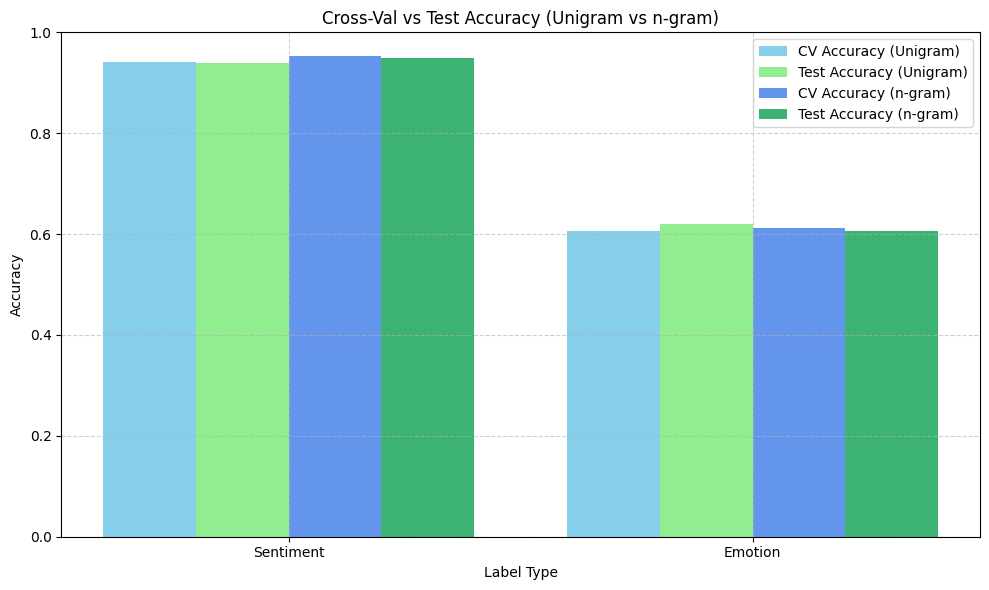

In [ ]:
labels = ['Sentiment', 'Emotion']
cv_scores_unigram = [best_score_sent, best_score_emot]
test_scores_unigram = [acc_sent, acc_emot]
cv_scores_ngram = [best_score_sent_n, best_score_emot_n]
test_scores_ngram = [acc_sentn, acc_emotn]

x = np.arange(len(labels))  # [0, 1]
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width*1.5, cv_scores_unigram, width=width, label='CV Accuracy (Unigram)', color='skyblue')
plt.bar(x - width/2, test_scores_unigram, width=width, label='Test Accuracy (Unigram)', color='lightgreen')
plt.bar(x + width/2, cv_scores_ngram, width=width, label='CV Accuracy (n-gram)', color='cornflowerblue')
plt.bar(x + width*1.5, test_scores_ngram, width=width, label='Test Accuracy (n-gram)', color='mediumseagreen')

plt.xlabel('Label Type')
plt.ylabel('Accuracy')
plt.title('Cross-Val vs Test Accuracy (Unigram vs n-gram)')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
model = SVC(**best_params_sent)
model_e = SVC(**best_params_emot)
model_n = SVC(**best_params_sent_n)
model_ne = SVC(**best_params_sent_n)


folds_sent = cross_val_score(model, X_train, y_train_sent, cv=5, scoring='accuracy')
folds_emot = cross_val_score(model_e, X_train, y_train_emot, cv=5, scoring='accuracy')
folds_sent_n = cross_val_score(model_n, Xn_train, yn_train_sent, cv=5, scoring='accuracy')
folds_emot_n = cross_val_score(model_ne, Xn_train, yn_train_emot, cv=5, scoring='accuracy')

In [ ]:
print("=== Per Fold Accuracy (Unigram) ===")
print("Sentiment:")
for i, acc in enumerate(folds_sent, 1):
    print(f"  Fold {i}: Accuracy = {acc:.4f}")

print("Emotion:")
for i, acc in enumerate(folds_emot, 1):
    print(f"  Fold {i}: Accuracy = {acc:.4f}")

print("\n=== Per Fold Accuracy (n-gram) ===")
print("Sentiment:")
for i, acc in enumerate(folds_sent_n, 1):
    print(f"  Fold {i}: Accuracy = {acc:.4f}")

print("Emotion:")
for i, acc in enumerate(folds_emot_n, 1):
    print(f"  Fold {i}: Accuracy = {acc:.4f}")


=== Per Fold Accuracy (Unigram) ===
Sentiment:
  Fold 1: Accuracy = 0.9481
  Fold 2: Accuracy = 0.9375
  Fold 3: Accuracy = 0.9399
  Fold 4: Accuracy = 0.9410
  Fold 5: Accuracy = 0.9410
Emotion:
  Fold 1: Accuracy = 0.6191
  Fold 2: Accuracy = 0.5979
  Fold 3: Accuracy = 0.6120
  Fold 4: Accuracy = 0.5967
  Fold 5: Accuracy = 0.6097

=== Per Fold Accuracy (n-gram) ===
Sentiment:
  Fold 1: Accuracy = 0.9552
  Fold 2: Accuracy = 0.9469
  Fold 3: Accuracy = 0.9517
  Fold 4: Accuracy = 0.9564
  Fold 5: Accuracy = 0.9505
Emotion:
  Fold 1: Accuracy = 0.6156
  Fold 2: Accuracy = 0.6002
  Fold 3: Accuracy = 0.5967
  Fold 4: Accuracy = 0.6050
  Fold 5: Accuracy = 0.6285


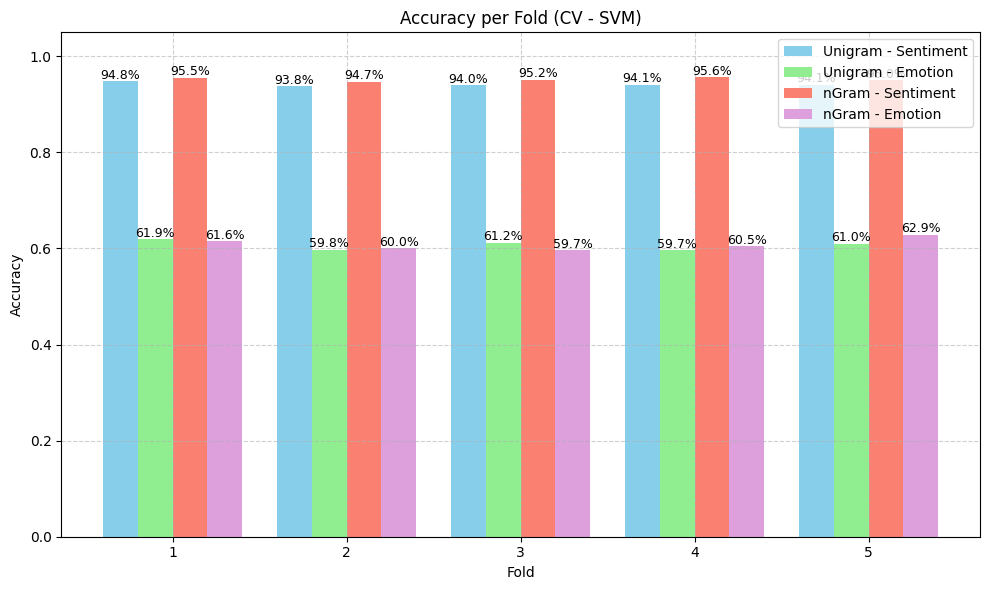

In [ ]:
folds = np.arange(1, 6)

bar_width = 0.2
offsets = [-1.5, -0.5, 0.5, 1.5]

plt.figure(figsize=(10, 6))

plt.bar(folds + offsets[0]*bar_width, folds_sent, width=bar_width, label='Unigram - Sentiment', color='skyblue')
plt.bar(folds + offsets[1]*bar_width, folds_emot, width=bar_width, label='Unigram - Emotion', color='lightgreen')
plt.bar(folds + offsets[2]*bar_width, folds_sent_n, width=bar_width, label='nGram - Sentiment', color='salmon')
plt.bar(folds + offsets[3]*bar_width, folds_emot_n, width=bar_width, label='nGram - Emotion', color='plum')

for i in range(5):
    plt.text(folds[i] + offsets[0]*bar_width, folds_sent[i] + 0.005, f"{folds_sent[i]*100:.1f}%", ha='center', fontsize=9)
    plt.text(folds[i] + offsets[1]*bar_width, folds_emot[i] + 0.005, f"{folds_emot[i]*100:.1f}%", ha='center', fontsize=9)
    plt.text(folds[i] + offsets[2]*bar_width, folds_sent_n[i] + 0.005, f"{folds_sent_n[i]*100:.1f}%", ha='center', fontsize=9)
    plt.text(folds[i] + offsets[3]*bar_width, folds_emot_n[i] + 0.005, f"{folds_emot_n[i]*100:.1f}%", ha='center', fontsize=9)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold (CV - SVM)')
plt.xticks(folds)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# TEST

In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

### Unigram TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset["Customer Review"])
y = dataset[["Sentiment","Emotion"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        for gamma in param_grid['gamma']:
            if kernel == 'linear' and 'gamma' in param_grid:
                continue

            base_model = SVC(C=C, kernel=kernel, gamma=gamma)
            model = MultiOutputClassifier(base_model)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            acc_sentiment = accuracy_score(y_test.iloc[:, 0], y_pred[:, 0])  # Sentiment
            acc_emotion = accuracy_score(y_test.iloc[:, 1], y_pred[:, 1])  # Emotion

            avg_acc = (acc_sentiment + acc_emotion) / 2  # Average Accuracy

            print(f"C={C}, Kernel={kernel}, Gamma={gamma} → Sentiment: {acc_sentiment:.4f}, Emotion: {acc_emotion:.4f}")

            # Early stopping condition (both tasks should reach threshold)
            if acc_sentiment >= 0.85 and acc_emotion >= 0.85:
                print(f"🎯 Early stopping! Found best model → C={C}, Kernel={kernel}, Gamma={gamma}")
                best_acc = avg_acc
                best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
                break
        if best_acc >= 0.85:
            break
    if best_acc >= 0.85:
        break

print(f"\n✅ Best Model → {best_params} with Average Accuracy: {best_acc:.4f}")

C=0.1, Kernel=rbf, Gamma=scale → Sentiment: 0.8074, Emotion: 0.3704
C=0.1, Kernel=rbf, Gamma=auto → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=rbf, Gamma=0.01 → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=rbf, Gamma=0.1 → Sentiment: 0.7315, Emotion: 0.3324
C=0.1, Kernel=rbf, Gamma=1 → Sentiment: 0.8083, Emotion: 0.3704
C=0.1, Kernel=poly, Gamma=scale → Sentiment: 0.5426, Emotion: 0.3296
C=0.1, Kernel=poly, Gamma=auto → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=poly, Gamma=0.01 → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=poly, Gamma=0.1 → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=poly, Gamma=1 → Sentiment: 0.5426, Emotion: 0.3296
C=0.1, Kernel=sigmoid, Gamma=scale → Sentiment: 0.8954, Emotion: 0.5306
C=0.1, Kernel=sigmoid, Gamma=auto → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=sigmoid, Gamma=0.01 → Sentiment: 0.5157, Emotion: 0.3296
C=0.1, Kernel=sigmoid, Gamma=0.1 → Sentiment: 0.5926, Emotion: 0.3296
C=0.1, Kernel=sigmoid, Gamma=1 → Sentiment: 0.8

### TF-IDF (n-Grams)

In [ ]:
vectorizer_n = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
Xn = vectorizer_n.fit_transform(dataset["Customer Review"])
Ys = dataset['Sentiment']
Ye = dataset['Emotion']

In [ ]:
for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        for gamma in param_grid['gamma']:
            if kernel == 'linear' and 'gamma' in param_grid:
                continue  # Gamma is ignored for linear kernel

            base_model = SVC(C=C, kernel=kernel, gamma=gamma, class_weight='balanced')
            model = MultiOutputClassifier(base_model)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            acc_sentiment = accuracy_score(y_test.iloc[:, 0], y_pred[:, 0])  # Sentiment
            acc_emotion = accuracy_score(y_test.iloc[:, 1], y_pred[:, 1])  # Emotion

            avg_acc = (acc_sentiment + acc_emotion) / 2  # Average Accuracy

            print(f"C={C}, Kernel={kernel}, Gamma={gamma} → Sentiment: {acc_sentiment:.4f}, Emotion: {acc_emotion:.4f}")

            # Early stopping condition (both sentiment and emotion accuracy ≥ 85%)
            if acc_sentiment >= 0.85 and acc_emotion >= 0.85:
                print(f"🎯 Early stopping! Found best model → C={C}, Kernel={kernel}, Gamma={gamma}")
                best_acc = avg_acc
                best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
                break
        if best_acc >= 0.85:
            break
    if best_acc >= 0.85:
        break

print(f"\n✅ Best Model → {best_params} with Average Accuracy: {best_acc:.4f}")

C=0.1, Kernel=rbf, Gamma=scale → Sentiment: 0.8880, Emotion: 0.4231
C=0.1, Kernel=rbf, Gamma=auto → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=rbf, Gamma=0.01 → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=rbf, Gamma=0.1 → Sentiment: 0.8713, Emotion: 0.1519
C=0.1, Kernel=rbf, Gamma=1 → Sentiment: 0.8880, Emotion: 0.4250
C=0.1, Kernel=poly, Gamma=scale → Sentiment: 0.5648, Emotion: 0.1481
C=0.1, Kernel=poly, Gamma=auto → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=poly, Gamma=0.01 → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=poly, Gamma=0.1 → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=poly, Gamma=1 → Sentiment: 0.5648, Emotion: 0.1481
C=0.1, Kernel=sigmoid, Gamma=scale → Sentiment: 0.9231, Emotion: 0.5343
C=0.1, Kernel=sigmoid, Gamma=auto → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=sigmoid, Gamma=0.01 → Sentiment: 0.4843, Emotion: 0.1472
C=0.1, Kernel=sigmoid, Gamma=0.1 → Sentiment: 0.7574, Emotion: 0.1472
C=0.1, Kernel=sigmoid, Gamma=1 → Sentiment: 0.9

# Cross Validation

## Unigram

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset["Customer Review"])
ys = dataset["Sentiment"]
ye = dataset["Emotion"]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import itertools
import numpy as np

C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto', 0.01, 0.1, 1]

best_score = 0
best_params = {}

for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    scores = cross_val_score(model, X, ys, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}

In [ ]:
print(f'best_score={best_score}')
print(f'best_params={best_params}')

for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

print(f'\nMean Accuracy: {np.mean(scores):.4f}')

best_score=0.930188679245283
best_params={'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
Fold 1: Accuracy = 0.9123
Fold 2: Accuracy = 0.8821
Fold 3: Accuracy = 0.8736
Fold 4: Accuracy = 0.8519
Fold 5: Accuracy = 0.8745

Mean Accuracy: 0.8789


In [ ]:
# Sentiment Model
final_model = SVC(**best_params)
final_model.fit(X, ys)

SVC(C=10)

In [ ]:
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto', 0.01, 0.1, 1]

best_score_e = 0
best_params_e = {}

for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
    model_e = SVC(C=C, kernel=kernel, gamma=gamma)
    scores_e = cross_val_score(model_e, X, ye, cv=5, scoring='accuracy')
    mean_score_e = np.mean(scores_e)

    if mean_score_e > best_score_e:
        best_score_e = mean_score_e
        best_params_e = {'C': C, 'kernel': kernel, 'gamma': gamma}

In [ ]:
print(f'best_score={best_score_e}')
print(f'best_params={best_params_e}')

for i, score in enumerate(scores_e, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

print(f'\nMean Accuracy: {np.mean(scores_e):.4f}')

best_score=0.5847169811320755
best_params={'C': 1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 1: Accuracy = 0.5311
Fold 2: Accuracy = 0.5198
Fold 3: Accuracy = 0.4745
Fold 4: Accuracy = 0.4934
Fold 5: Accuracy = 0.4887

Mean Accuracy: 0.5015


In [ ]:
# Emotion Model
final_model_e = SVC(**best_params_e)
final_model_e.fit(X, ye)

SVC(C=1, kernel='linear')

## n_grams

In [ ]:
vectorizer_n = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
Xn = vectorizer_n.fit_transform(dataset["Customer Review"])
Ys = dataset['Sentiment']
Ye = dataset['Emotion']

In [ ]:
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto', 0.01, 0.1, 1]

best_score_n = 0
best_params_n = {}

for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
    model_n = SVC(C=C, kernel=kernel, gamma=gamma)
    scores_n = cross_val_score(model_n, Xn, Ys, cv=5, scoring='accuracy')
    mean_score_n = np.mean(scores_n)

    if mean_score_n > best_score_n:
        best_score_n = mean_score_n
        best_params_n = {'C': C, 'kernel': kernel, 'gamma': gamma}

In [ ]:
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto', 0.01, 0.1, 1]

best_score_ne = 0
best_params_ne = {}

for C, kernel, gamma in itertools.product(C_values, kernels, gammas):
    model_ne = SVC(C=C, kernel=kernel, gamma=gamma)
    scores_ne = cross_val_score(model_ne, Xn, Ye, cv=5, scoring='accuracy')
    mean_score_ne = np.mean(scores_ne)

    if mean_score_ne > best_score_ne:
        best_score_ne = mean_score_ne
        best_params_ne = {'C': C, 'kernel': kernel, 'gamma': gamma}

In [ ]:
print(f'best_score={best_score_n}')
print(f'best_params={best_params_n}')

for i, score in enumerate(scores_n, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

print(f'\nMean Accuracy: {np.mean(scores_n):.4f}')

best_score=0.9403773584905659
best_params={'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
Fold 1: Accuracy = 0.9085
Fold 2: Accuracy = 0.8972
Fold 3: Accuracy = 0.8604
Fold 4: Accuracy = 0.8679
Fold 5: Accuracy = 0.8679

Mean Accuracy: 0.8804


In [ ]:
print(f'best_score={best_score_ne}')
print(f'best_params={best_params_ne}')

for i, score in enumerate(scores_ne, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

print(f'\nMean Accuracy: {np.mean(scores_ne):.4f}')

best_score=0.580377358490566
best_params={'C': 1, 'kernel': 'sigmoid', 'gamma': 1}
Fold 1: Accuracy = 0.5255
Fold 2: Accuracy = 0.4953
Fold 3: Accuracy = 0.4906
Fold 4: Accuracy = 0.4717
Fold 5: Accuracy = 0.4623

Mean Accuracy: 0.4891


In [ ]:
# Sentiment Model -n
final_model_n = SVC(**best_params_n)
final_model_n.fit(Xn, Ys)

SVC(C=10)

In [ ]:
# Emotion Model -n
final_model_ne = SVC(**best_params_ne)
final_model_ne.fit(Xn, Ye)

SVC(C=1, gamma=1, kernel='sigmoid')

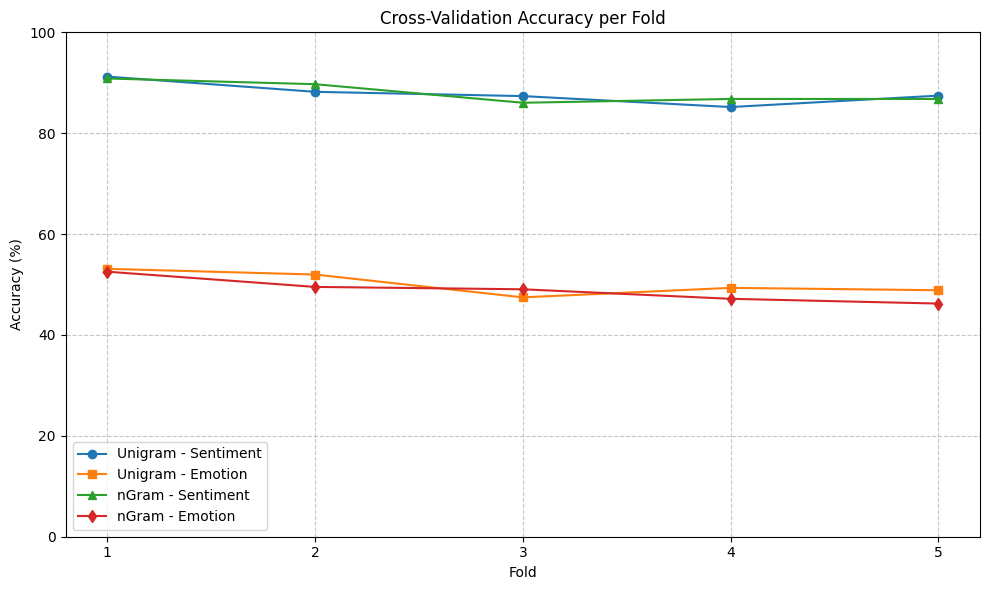

In [ ]:
# Cross Validation - SVM
# scores = Unigram, Sentiment
# scores_e = Unigram, Emotion
# scores_n = nGram, Sentiment
# scores_ne = nGram, Emotion
import matplotlib.pyplot as plt

scores_percent = [s * 100 for s in scores]
scores_e_percent = [s * 100 for s in scores_e]
scores_n_percent = [s * 100 for s in scores_n]
scores_ne_percent = [s * 100 for s in scores_ne]

folds = list(range(1, 6))  # 5-fold

plt.figure(figsize=(10, 6))
plt.plot(folds, scores_percent, marker='o', label='Unigram - Sentiment')
plt.plot(folds, scores_e_percent, marker='s', label='Unigram - Emotion')
plt.plot(folds, scores_n_percent, marker='^', label='nGram - Sentiment')
plt.plot(folds, scores_ne_percent, marker='d', label='nGram - Emotion')

plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy per Fold')
plt.ylim(0, 100)
plt.xticks(folds)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

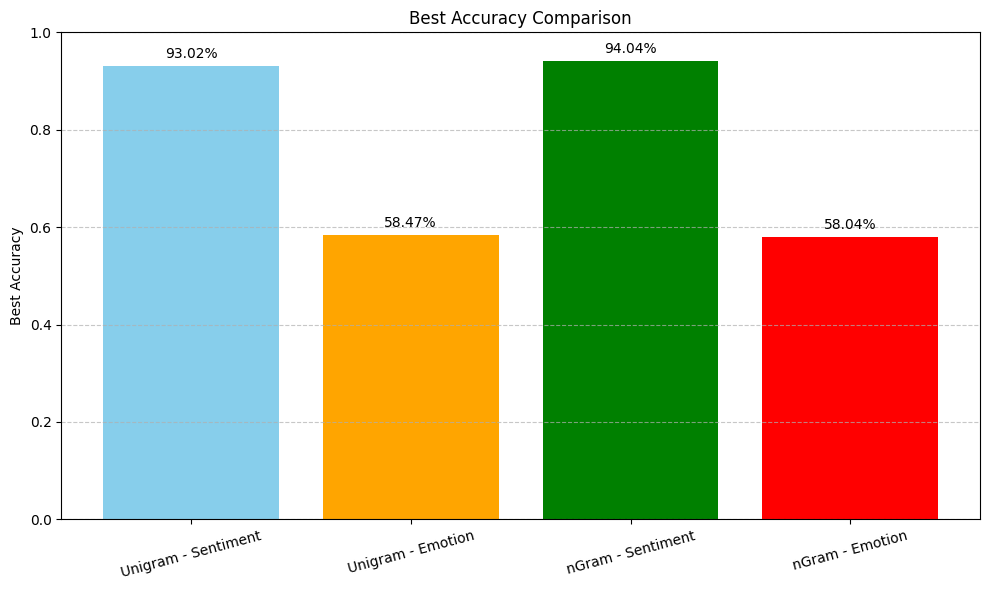

In [ ]:
labels = ['Unigram - Sentiment', 'Unigram - Emotion', 'nGram - Sentiment', 'nGram - Emotion']
scores = [best_score, best_score_e, best_score_n, best_score_ne]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color=['skyblue', 'orange', 'green', 'red'])

# Tambahkan nilai akurasi di atas masing-masing bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)

plt.ylabel('Best Accuracy')
plt.title('Best Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


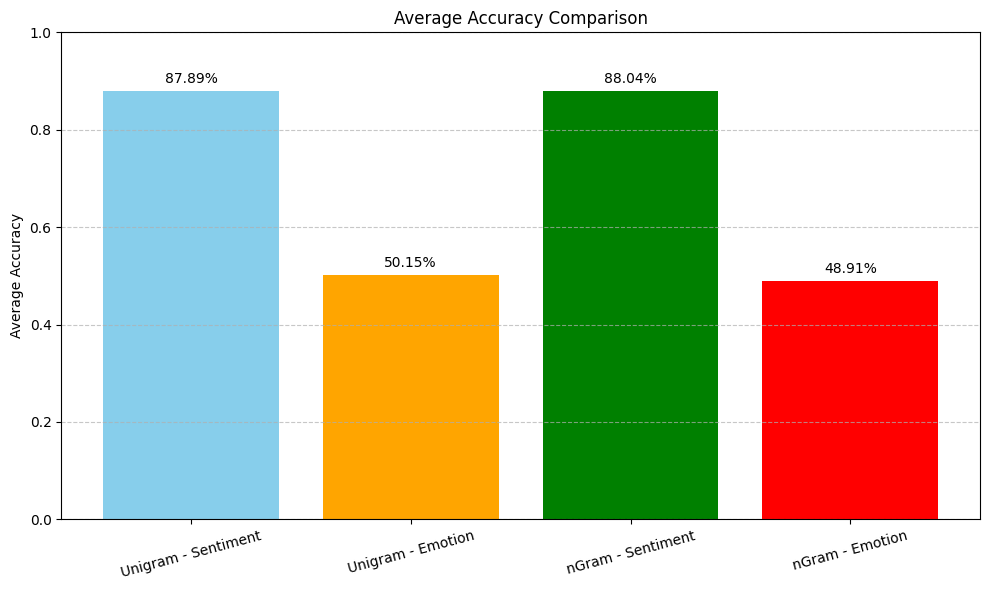

In [ ]:
labels = ['Unigram - Sentiment', 'Unigram - Emotion', 'nGram - Sentiment', 'nGram - Emotion']
scores = [mean_score, mean_score_e, mean_score_n, mean_score_ne]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color=['skyblue', 'orange', 'green', 'red'])

# Tambahkan nilai akurasi di atas masing-masing bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)

plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Train-Test

## Evaluation

Multi Ouput Best Results (No Weight Balance, Unigrams TF-IDF):
- C=100, Kernel=sigmoid, Gamma=0.01 → Sentiment: 0.9463, Emotion: 0.6315
- C=100, Kernel=rbf, Gamma=0.01 → Sentiment: 0.9435, Emotion: 0.6306
- C=10, Kernel=sigmoid, Gamma=0.1 → Sentiment: 0.9463, Emotion: 0.6315





Multi Ouput Best Results (w/ Weight Balance, Unigrams TF-IDF):
- C=100, Kernel=sigmoid, Gamma=0.01 → Sentiment: 0.9472, Emotion: 0.6231
- C=10, Kernel=sigmoid, Gamma=0.1 → Sentiment: 0.9472, Emotion: 0.6241
- C=10, Kernel=rbf, Gamma=scale → Sentiment: 0.9370, Emotion: 0.6269


Multi Output Best Result (Weight Balance and N-grams TF-IDF):
- C=100, Kernel=rbf, Gamma=1 → Sentiment: 0.9509, Emotion: 0.6380
- C=100, Kernel=rbf, Gamma=scale → Sentiment: 0.9509, Emotion: 0.6389
- C=10, Kernel=rbf, Gamma=1 → Sentiment: 0.9509, Emotion: 0.6389



Multi Output Best Result (No Weight Balance and N-grams TF-IDF):
- C=10, Kernel=rbf, Gamma=1 → Sentiment: 0.9509, Emotion: 0.6352
- C=100, Kernel=rbf, Gamma=1 → Sentiment: 0.9509, Emotion: 0.6352
- C=100, Kernel=rbf, Gamma=scale → Sentiment: 0.9509, Emotion: 0.6352
